In [1]:
import os
#os.system('cls')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time, json
pd.options.mode.chained_assignment = None

### Functions

Remove unwanted columns

In [2]:
def trimp_data(data_file,all_attribute,nec_attribute):
    '''This function removes unwanted attributes/columns from the input file.
    nec_attribute: necessary attributes
    all_attribute: all attributes
    datafile: data file name'''
    
    drop_attribute = all_attribute.copy()
    for kk in nec_attribute:
        if kk in all_attribute:
            drop_attribute.remove(kk)
    return data_file.drop(drop_attribute,axis = 1)   

Attribute_1 (Importance)

In [3]:
def Importance():
    '''A function that returns a list of importance values each between 0 and 1
       that have been assigned to based on averaging the urgency and value columns for each stakeholder.'''
    # Defining dictionaries
    norU_dict = dict(dfile_req[Urgency_nec_attribute])
    norV_dict = dict(dfile_req[Value_nec_attribute])
    norU = []
    norV = []
    # Creates lists where the average urgency and value parameters will be stored
    norU_avg = list(range(no_of_req))
    norV_avg = list(range(no_of_req))
    
    # Creates list where the importance value will be stored
    Imp = list(range(no_of_req))
    
    # Setting the values of the norU and norV lists of lists
    for kk in range(1,5):
        norU.append(list(norU_dict[Urgency_nec_attribute[kk]]))
        norV.append(list(norV_dict[Value_nec_attribute[kk]]))
    
    # Calculates the average value for norU and norV for each requirement, 
    # These average values are then normalized to be between 0 and 1
    # There average is taken to be the importance of each requirement 
    for k in range(no_of_req):
        norU_avg[k] = (norU[0][k] + norU[1][k] + norU[2][k] + norU[3][k])/(4*10)
        norV_avg[k] = (norV[0][k] + norV[1][k] + norV[2][k] + norV[3][k])/(4*10)
        Imp[k] = (norU_avg[k] + norV_avg[k])/2    
    #return Imp, norU_avg, norV_avg
    return Imp

Attribute_2 (Dependency)

In [4]:
def Dependency(req_attribute):
    ''' A function that calculates the total number of elements in a given column for each requirement 
        if the cell contains a string list separated by commas. This is used to calculate the total number of
        Coupling or Precedes type of dependencies per requirement.'''
    
    list_dep = list(dfile_req[req_attribute])
    C_P = list(range(no_of_req))
    for k in range(no_of_req):
        temp = list_dep[k]
        c_p  = 0
        if type(temp) is str:
            c_p = len(temp.split(','))                            
        C_P[k] = c_p 
    return C_P

Attribute_3 (Implementation Cost)

In [5]:
def Implementation_Cost():
    ''' A function that calculates the implementation cost of each requirement'''
    Cost_dict = dict(dfile_req[req_all_attribute[3:8]])
    Cost_list = []
    Cost_sum = list(range(no_of_req))
    a = list(range(no_of_req))
    b = list(range(no_of_req))
    c = list(range(no_of_req))
    for kk in range(3,8):
        Cost_list.append(list(Cost_dict[req_all_attribute[kk]]))           
    for k in range(no_of_req):
        Cost_sum[k] = (Cost_list[0][k] + Cost_list[1][k] + Cost_list[2][k] + Cost_list[3][k] + Cost_list[4][k])
        a[k] = 0.25*Cost_sum[k]
        b[k] = 4*Cost_sum[k]
        c[k] = (b[k] - a[k])*0.2
    return Cost_sum, a, b, c

Attribute_4 (Cost Overrun Probability)

In [6]:
def Cost_Overrun():
    cost_over_prob = list(range(no_of_req))
    for k in range(no_of_req):
        fx = np.random.triangular(a_cost[k],c_cost[k],b_cost[k],mcs_range)
        cost_over_prob[k] = (sum(fx_prob >= 1.5*Imp_Cost[k] for fx_prob in fx))/mcs_range
    return cost_over_prob

Data pre-processing

Read input requirement excel file

In [30]:
# Reading in the Excel file sheets: 3 (Requirements), 5 (Urgency), 6 (Value)
dfile = pd.read_excel('dataset-1.xls', [3,5,6], header=1) # if any error, please type "pip install xlrd" in cmd window

# Defining the number of requirements 
no_of_req = 50

dfile_req = dfile[3]
dfile_req = dfile_req[0:no_of_req]

# Listing out all the attributes for the requirements (read in from the column names of the Requirements Sheet)
req_all_attribute = list(dfile_req.columns)

# Setting up the necessary attributes for the requirements
req_nec_attribute = ['ID',
                     'Couplings ',
                     'Precedes',
                     'Requirement Elicitation',
                     'Design',
                     'Application Development',
                     'External Tools Development',
                     'QA / Testing']

# Trimming the dataframe from the unnecessary attributes
dfile_req = trimp_data(dfile_req,req_all_attribute,req_nec_attribute)

# Printing out the remaining dataframe
print(dfile_req)

          ID     Couplings                                            Precedes
0     File-1            NaN  File-4,File-5,File-6,File-7,File-8,File-9,File...
1     File-2         File-4  File-3,File-6,File-7,File-8,File-9,File-10,Fil...
2     File-3            NaN                                            File-12
3     File-4            NaN                                            File-12
4     File-5         File-4                                            File-12
5     File-6            NaN                                            File-12
6     File-7            NaN                                    File-10,File-12
7     File-8            NaN                                             File-9
8     File-9            NaN                                            File-12
9    File-10            NaN                                            File-12
10   File-11            NaN                                            File-12
11   File-12            NaN                         

Importance - Urgency

In [8]:
# Working with the Importance Sheet now
dfile_Urgency = dfile[5]

print(dfile_Urgency)

# Selecting all requirements to be part of the dataframe
dfile_Urgency = dfile_Urgency[0:no_of_req]

# Defines the necessary columns from the datafile
Urgency_all_attribute = list(dfile_Urgency.columns)
Urgency_nec_attribute = ['Feature ID', 'Urgency1', 'Urgency2', 'Urgency3', 'Urgency4']

# Renames the names of the columns corresponding to the necessary attributes (first 5 columns)
Urgency_all_attribute[0:5] = Urgency_nec_attribute

dfile_Urgency.columns = Urgency_all_attribute

# Removes the unnecessary attributes from the urgency dataframe
dfile_Urgency = trimp_data(dfile_Urgency,Urgency_all_attribute,Urgency_nec_attribute)

# Printing the Urgency dataframe
print(dfile_Urgency)

    Feature ID    0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.30  0.31  \
0            0  9.0  9.0  9.0  9.0  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
1            0  9.0  9.0  9.0  9.0  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
2            0  9.0  9.0  9.0  1.0  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
3            0  9.0  9.0  9.0  9.0  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
4            0  7.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
..         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
61           0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
62           0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
63           0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
64           0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
65           0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   

    0.32  0.33  0.34  0.35  0.36  0.37 

Importance - Value

In [9]:
dfile_Value = dfile[6]
dfile_Value= dfile_Value[0:no_of_req]
Value_all_attribute = list(dfile_Value.columns)
Value_nec_attribute = ['ID', 'Value1', 'Value2', 'Value3', 'Value4']
Value_all_attribute[0:5] = Value_nec_attribute
dfile_Value.columns = Value_all_attribute
dfile_Value = trimp_data(dfile_Value,Value_all_attribute,Value_nec_attribute)
print(dfile_Value)

    ID  Value1  Value2  Value3  Value4
0    0     8.0     9.0     9.0     9.0
1    0     8.0     9.0     9.0     9.0
2    0     8.0     9.0     9.0     1.0
3    0     8.0     9.0     9.0     9.0
4    0     6.0     5.0     3.0     1.0
5    0     3.0     3.0     5.0     5.0
6    0     3.0     3.0     1.0     5.0
7    0     7.0     5.0     9.0     9.0
8    0     8.0     9.0     9.0     9.0
9    0     6.0     8.0     1.0     5.0
10   0     2.0     2.0     1.0     7.0
11   0     8.0     9.0     9.0     3.0
12   0     6.0     5.0     9.0     8.0
13   0     6.0     2.0     4.0     8.0
14   0     6.0     6.0     9.0     8.0
15   0     6.0     6.0     9.0     8.0
16   0     3.0     6.0     9.0     8.0
17   0     3.0     2.0     4.0     4.0
18   0     3.0     2.0     1.0     4.0
19   0     6.0     5.0     9.0     6.0
20   0     6.0     5.0     9.0     6.0
21   0     6.0     1.0     9.0     8.0
22   0     4.0     9.0     5.0     1.0
23   0     3.0     5.0     7.0     7.0
24   0     4.0     2.0   

Requirements with all attributes

In [10]:
dfile_req[Urgency_nec_attribute] = dfile_Urgency
dfile_req[Value_nec_attribute] = dfile_Value
req_all_attribute = list(dfile_req.columns)
print(dfile_req)

    ID     Couplings                                            Precedes  \
0    0            NaN  File-4,File-5,File-6,File-7,File-8,File-9,File...   
1    0         File-4  File-3,File-6,File-7,File-8,File-9,File-10,Fil...   
2    0            NaN                                            File-12   
3    0            NaN                                            File-12   
4    0         File-4                                            File-12   
5    0            NaN                                            File-12   
6    0            NaN                                    File-10,File-12   
7    0            NaN                                             File-9   
8    0            NaN                                            File-12   
9    0            NaN                                            File-12   
10   0            NaN                                            File-12   
11   0            NaN                                                NaN   
12   0      

Attribute_1 (Importance)

In [11]:
# Calculating the importance value for each requirement using the above defined function
# and storing it in the list Imp
Imp = Importance()

# Printing the Imp list
print(Imp)

[0.8875, 0.8875, 0.6875, 0.8875, 0.3125, 0.4875, 0.2875, 0.7625, 0.8875, 0.5125, 0.275, 0.7124999999999999, 0.6875, 0.5125, 0.7124999999999999, 0.7124999999999999, 0.6625000000000001, 0.30000000000000004, 0.25, 0.6375, 0.6375, 0.5874999999999999, 0.44999999999999996, 0.55, 0.225, 0.225, 0.6125, 0.575, 0.6499999999999999, 0.575, 0.35, 0.5, 0.75, 0.625, 0.6625000000000001, 0.3125, 0.1375, 0.75, 0.5125, 0.1375, 0.38749999999999996, 0.2375, 0.3125, 0.6, 0.625, 0.625, 0.475, 0.4625, 0.55, 0.5249999999999999]


Attribute_2 (Dependency)

In [12]:
# counts the dependencies of each requirement (whether it is Coupling or Preceding type of dependency)
depNum_Coupling = Dependency(req_all_attribute[1])
depNum_Precedes = Dependency(req_all_attribute[2])

# Creates a list (depNum) where the dependencies will be stored
depNum = list(range(no_of_req))

# Stores the total number of coupling and preceeding dependencies of each requirement in depNum
for k in range(no_of_req):
    depNum[k] = depNum_Coupling[k] + depNum_Precedes[k]

# Printing the depNum list    
print(depNum)    

[15, 17, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 3, 2, 2, 0, 0, 0, 4, 1, 1, 1, 0, 1, 1, 0, 0, 0, 5, 1, 1, 0, 0, 0, 1, 0]


Attribute_3 (Implementation Cost)

In [13]:
# Calculates the implementation costs using the above defined function
Imp_Cost, a_cost, b_cost, c_cost = Implementation_Cost()

# Printing the different implementation costs
print(Imp_Cost, a_cost, b_cost, c_cost)

[36.0, 36.0, 28.0, 36.0, 10.0, 23.0, 11.0, 31.0, 36.0, 21.0, 10.0, 28.0, 27.0, 21.0, 28.0, 28.0, 27.0, 11.0, 10.0, 25.0, 25.0, 23.0, 17.0, 22.0, 7.0, 7.0, 21.0, 21.0, 24.0, 20.0, 12.0, 19.0, 30.0, 23.0, 26.0, 12.0, 5.0, 30.0, 21.0, 5.0, 14.0, 9.0, 13.0, 24.0, 25.0, 25.0, 20.0, 19.0, 20.0, 19.0] [9.0, 9.0, 7.0, 9.0, 2.5, 5.75, 2.75, 7.75, 9.0, 5.25, 2.5, 7.0, 6.75, 5.25, 7.0, 7.0, 6.75, 2.75, 2.5, 6.25, 6.25, 5.75, 4.25, 5.5, 1.75, 1.75, 5.25, 5.25, 6.0, 5.0, 3.0, 4.75, 7.5, 5.75, 6.5, 3.0, 1.25, 7.5, 5.25, 1.25, 3.5, 2.25, 3.25, 6.0, 6.25, 6.25, 5.0, 4.75, 5.0, 4.75] [144.0, 144.0, 112.0, 144.0, 40.0, 92.0, 44.0, 124.0, 144.0, 84.0, 40.0, 112.0, 108.0, 84.0, 112.0, 112.0, 108.0, 44.0, 40.0, 100.0, 100.0, 92.0, 68.0, 88.0, 28.0, 28.0, 84.0, 84.0, 96.0, 80.0, 48.0, 76.0, 120.0, 92.0, 104.0, 48.0, 20.0, 120.0, 84.0, 20.0, 56.0, 36.0, 52.0, 96.0, 100.0, 100.0, 80.0, 76.0, 80.0, 76.0] [27.0, 27.0, 21.0, 27.0, 7.5, 17.25, 8.25, 23.25, 27.0, 15.75, 7.5, 21.0, 20.25, 15.75, 21.0, 21.0, 20.25, 

Attribute_4 (Cost Overrun Probability)

In [14]:
mcs_range = 10000
p_cost = Cost_Overrun()
print(p_cost)

[0.5141, 0.5127, 0.5194, 0.5122, 0.5055, 0.5109, 0.5167, 0.5147, 0.5197, 0.5145, 0.512, 0.513, 0.5102, 0.5126, 0.5156, 0.5073, 0.5275, 0.5114, 0.512, 0.5088, 0.5177, 0.5135, 0.5072, 0.5187, 0.5115, 0.5111, 0.5158, 0.5113, 0.5178, 0.51, 0.5142, 0.5123, 0.5163, 0.5085, 0.5167, 0.5102, 0.5078, 0.5071, 0.5069, 0.5053, 0.5239, 0.5141, 0.5061, 0.5124, 0.524, 0.5177, 0.5141, 0.5134, 0.5149, 0.5197]


Fitness function

In [15]:
def fitness_function(X):
    ''' Defines an objective fitness function. The extremum value of this function will be located 
        by the different optimizers.'''
    # Setting the fitness values of importance to zero
    fit_imp = 0
    # Setting the fitness value of dependency to zero
    fit_dep = 0
    # Setting the fitness value of implementation cost to zero
    fit_cost = 0
    # Setting the fitness value of cost overrun probability to zero
    fit_pco = 0
    
    # Calculating the fitness values for importance
    for k in range(no_of_req):
        # fit_imp makes sure that the important tasks are prioritized (normalized importance value)
        # the larger fit_imp is, the better the ending order represent the importance order
        fit_imp = fit_imp + (( ((no_of_req - X[k]) * Imp[k]) / no_of_req ) / sum(Imp))
        
        # fit_dep makes sure that the tasks with more dependencies are prioritized (normalized dependency number)
        # the larger fit_dep is, the better the ending order represent the order where more dependent tasks are
        # completed earlier
        fit_dep = fit_dep + (( ((no_of_req - X[k]) * depNum[k]) / no_of_req ) / sum(depNum))
        
        # fit_cost makes sure that the larger the implementation cost of a task is, the earlier it gets completed 
        fit_cost = fit_cost  + (( ((no_of_req - X[k]) * Imp_Cost[k]) / no_of_req ) / sum(Imp_Cost))
                
        # fit_pco makes sure that the larger the probability that a task overruns the costs is,
        # the higher priority it gets, the earlier it gets completed
        fit_pco = fit_pco + (( ((no_of_req - X[k]) * p_cost[k]) / no_of_req ) / sum(p_cost))
        
    return (fit_imp + fit_dep + fit_cost + fit_pco)

In [16]:
def fitness_function_matrix(Imp, depNum, Imp_Cost, p_cost):
    matrix = np.zeros((no_of_req,no_of_req))
    for k in range(no_of_req):
        for j in range(no_of_req):
            matrix[k,j] += (( ((no_of_req - j) * Imp[k]) / no_of_req ) / sum(Imp))
            matrix[k,j] += (( ((no_of_req - j) * depNum[k]) / no_of_req ) / sum(depNum))
            matrix[k,j] += (( ((no_of_req - j) * Imp_Cost[k]) / no_of_req ) / sum(Imp_Cost))
            matrix[k,j] += (( ((no_of_req - j) * p_cost[k]) / no_of_req ) / sum(p_cost))
    return matrix

In [17]:
# Defines the number of maximum Iterations an optimizer algorithm can take
maximumIterations = 30

# Black Hole Algorithm

In [ ]:
import BlackHole as bh

In [ ]:
# Example usage
# Defines the start time for the Particle Swarm optimizer
bh_start = time.time()

num_requirements = 50   # Total number of requirements
num_solutions = 100       # Number of solutions to consider
max_iterations = 50    # Maximum number of iterations

# Run the Black Hole Optimization Algorithm
best_solution = bh.black_hole_optimization(objective_function=fitness_function, 
                                        num_requirements=num_requirements,
                                        num_solutions=num_solutions, 
                                        max_iterations=max_iterations)

bh_total = time.time()-bh_start

print("Best values of x: ", best_solution)
print("Best values of f(x): ", fitness_function(best_solution))
print("BH took ",bh_total," seconds")

In [ ]:
Nruns = 5
Nsolutions = np.linspace(5,105,11)
Niterations = np.linspace(30,150,10)
timeAV = np.zeros((len(Nsolutions),len(Niterations)))
resAV = np.zeros((len(Nsolutions),len(Niterations)))

for i, nsols in enumerate(Nsolutions):
    num_solutions=int(nsols)
    for j, maxit in enumerate(Niterations):
        max_iterations=int(maxit)
        times = list()
        results = list()
        for run in range(Nruns):
            bh_start = time.time()
            best_solution = bh.black_hole_optimization(objective_function=fitness_function, 
                                        num_requirements=num_requirements,
                                        num_solutions=num_solutions, 
                                        max_iterations=max_iterations)
            bh_total = time.time()-bh_start
            times.append(bh_total)
            bestBH = fitness_function(best_solution)
            results.append(bestBH)
        timeAV[i,j] = np.average(times)
        resAV[i,j] = np.average(results)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8), sharex=True, sharey=True)
X, Y = np.meshgrid(Nsolutions, Niterations)
cf1 = ax1.contourf(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'))
cf2 = ax2.contourf(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'))
im1 = ax3.pcolormesh(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
im2 = ax4.pcolormesh(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
ax1.set_ylabel('maximum iterations')
ax3.set_ylabel('maximum iterations')
ax3.set_xlabel('number of solutions')
ax4.set_xlabel('number of solutions')
fig.colorbar(cf1, ax=ax1)
fig.colorbar(cf2, ax=ax2)
fig.colorbar(im1, ax=ax3)
fig.colorbar(im2, ax=ax4)
plt.show()
        
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8), sharey=True)
X, Y = np.meshgrid(Nsolutions, Niterations)
cf1 = ax1.contourf(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'))
cf2 = ax2.contourf(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'))
fig.colorbar(cf1, ax=ax1)
fig.colorbar(cf2, ax=ax2)
ax1.set_ylabel('maximum iterations')
ax1.set_xlabel('number of solutions')
ax2.set_xlabel('number of solutions')
plt.show()
        
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8), sharey=True)
X, Y = np.meshgrid(Nsolutions, Niterations)
im1 = ax1.pcolormesh(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
im2 = ax2.pcolormesh(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
ax1.set_ylabel('maximum iterations')
ax1.set_xlabel('number of solutions')
ax2.set_xlabel('number of solutions')
plt.show()

In [ ]:
Nsolutions, Niterations

In [ ]:
maxit = 150.
nsols = 35
max_iterations=int(maxit)
num_solutions=int(nsols)
times = list()
results = list()
for run in range(Nruns):
    bh_start = time.time()
    best_solution = bh.black_hole_optimization(objective_function=fitness_function, 
                                 num_requirements=num_requirements,
                                 num_solutions=num_solutions, 
                                 max_iterations=max_iterations)
    bh_total = time.time()-bh_start
    times.append(bh_total)
    bestBH = fitness_function(best_solution)
    results.append(bestBH)
time1 = np.average(times)
res1 = np.average(results)

In [ ]:
time1, res1

In [ ]:
#np.savetxt('resAV.txt', np.round(resAV,4), fmt='%8.3f', delimiter=',')
#np.savetxt('timeAV.txt', np.round(timeAV,4), fmt='%8.3f', delimiter=',')
timeAV = np.loadtxt('timeAV.txt', delimiter=',')
resAV = np.loadtxt('resAV.txt', delimiter=',')

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8), sharex=True, sharey=True)
X, Y = np.meshgrid(Nsolutions, Niterations)
cf1 = ax1.contourf(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'))
cf2 = ax2.contourf(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'))
im1 = ax3.pcolormesh(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
im2 = ax4.pcolormesh(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
ax1.set_ylabel('maximum iterations')
ax3.set_ylabel('maximum iterations')
ax3.set_xlabel('number of solutions')
ax4.set_xlabel('number of solutions')
fig.colorbar(cf1, ax=ax1)
fig.colorbar(cf2, ax=ax2)
fig.colorbar(im1, ax=ax3)
fig.colorbar(im2, ax=ax4)
plt.savefig('comparison_time_objective_function_value.png', dpi=200)
plt.show()

In [ ]:
# Running the Black Hole Algorithm many times and seeing how different tasks get sorted
Nruns = 10
num_solutions = 65
max_iterations = 100

diction = {}
for jj in range(num_requirements):
    diction[jj] = list()
maxBH = 2.1
for i in range(Nruns):
    best_solution = bh.black_hole_optimization(objective_function=fitness_function, 
                                        num_requirements=num_requirements,
                                        num_solutions=num_solutions, 
                                        max_iterations=max_iterations)
    if fitness_function(best_solution) > maxBH:
        maxBH = fitness_function(best_solution)
        maxSol = best_solution
    for jj in range(num_requirements):
        diction[jj].append(best_solution[jj])

In [ ]:
fig,axs = plt.subplots(5,10,figsize=(25,15), sharex=True, sharey=True)
colors = ['gold']*12+['lightgreen']*10+['crimson']*5+['mediumblue']*5+['orange']*5+['forestgreen']*6+['darkviolet']*5+['peru']*2

for jj in range(num_requirements):
    axs[jj//10,jj%10].hist(diction[jj],bins=[-1,10,20,30,40,50], density=True, 
                           color=colors[jj], alpha=0.5,
                           label=dfile_req['ID'][jj])
    axs[jj//10,jj%10].vlines(x=maxSol[jj],ymin=0,ymax=0.1,color='black',linestyle='--')
    
    axs[jj//10,jj%10].set_xlim([-1,num_requirements+1])
    axs[jj//10,jj%10].set_ylim([0,0.1])
    axs[jj//10,jj%10].legend(loc='upper center')
    axs[jj//10,jj%10].set_xticks([0,10,20,30,40,50])
    if jj%10==0: axs[jj//10,jj%10].set_ylabel('probability of requirement')
    if jj//10==4: axs[jj//10,jj%10].set_xlabel('order number')
    
plt.savefig('BlackHole_maxit%d_numsol%d_nruns%d_performance.png'%(max_iterations,num_solutions,Nruns))
with open('bestrun_details.txt','a+') as f:
    f.write('%5d|%5d|%5d|%7.3f|['%(max_iterations,num_solutions,Nruns,maxBH)+','.join(str(i) for i in maxSol)+']\n')
plt.show()

In [ ]:
# Adding some informative columns about parts of the fitness function for the output file to be created
dfile_req["Importance"] = Imp
dfile_req["Dependency"] = depNum
dfile_req["Implementation Cost"] = Imp_Cost
dfile_req["Cost Overrun Probability"] = p_cost

# Sorting the output file according to the solution vector
dfile_req.index = best_solution
bhfile_req = dfile_req.sort_index()
bhfile_req

In [ ]:
# Printing the output file to a .csv file called BlackHole_output.csv
bhfile_req.to_csv('BlackHole_output.csv', index=False, encoding='utf-8', sep=";")

# Particle Swarm Optimizer 2

In [ ]:
import ParticleSwarm as ps

In [ ]:
# PSO parameters
num_requirements = 50   # Number of requirements
num_particles = 20      # Number of particles
max_iterations = 100   # Maximum iterations
w = 0.7                 # Inertia weight
c1 = 0.6                # Cognitive coefficient
c2 = 0.7                # Social coefficient

# Run PSO
best_solution = ps.particle_swarm_optimization(objective_function=fitness_function,
                                               num_requirements=num_requirements,
                                               num_particles=num_particles,
                                               max_iterations=max_iterations,
                                               w=w,
                                               c1=c1,
                                               c2=c2)
print("Best values of x: ", best_solution)
print("Best values of f(x): ", fitness_function(best_solution))

In [ ]:
Nruns = 5
Nparticles = np.linspace(5,105,11)
Niterations = np.linspace(30,150,10)
timeAV = np.zeros((len(Nparticles),len(Niterations)))
resAV = np.zeros((len(Nparticles),len(Niterations)))

for i, nparticle in enumerate(Nparticles):
    num_particles=int(nparticle)
    for j, maxit in enumerate(Niterations):
        max_iterations=int(maxit)
        times = list()
        results = list()
        for run in range(Nruns):
            pso_start = time.time()
            best_solution = ps.particle_swarm_optimization(objective_function=fitness_function,
                                               num_requirements=num_requirements,
                                               num_particles=num_particles,
                                               max_iterations=max_iterations,
                                               w=w,
                                               c1=c1,
                                               c2=c2)
            pso_total = time.time()-pso_start
            times.append(pso_total)
            bestPSO = fitness_function(best_solution)
            results.append(bestPSO)
        timeAV[i,j] = np.average(times)
        resAV[i,j] = np.average(results)

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8), sharex=True, sharey=True)
X, Y = np.meshgrid(Nparticles, Niterations)
cf1 = ax1.contourf(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'))
cf2 = ax2.contourf(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'))
im1 = ax3.pcolormesh(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
im2 = ax4.pcolormesh(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
ax1.set_ylabel('maximum iterations')
ax3.set_ylabel('maximum iterations')
ax3.set_xlabel('number of solutions')
ax4.set_xlabel('number of solutions')
fig.colorbar(cf1, ax=ax1)
fig.colorbar(cf2, ax=ax2)
fig.colorbar(im1, ax=ax3)
fig.colorbar(im2, ax=ax4)
plt.savefig('PSO_comparison_time_objective_function_value.png', dpi=200)
plt.show()
        
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8), sharey=True)
X, Y = np.meshgrid(Nparticles, Niterations)
cf1 = ax1.contourf(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'))
cf2 = ax2.contourf(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'))
fig.colorbar(cf1, ax=ax1)
fig.colorbar(cf2, ax=ax2)
ax1.set_ylabel('maximum iterations')
ax1.set_xlabel('number of solutions')
ax2.set_xlabel('number of solutions')
plt.show()
        
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8), sharey=True)
X, Y = np.meshgrid(Nparticles, Niterations)
im1 = ax1.pcolormesh(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
im2 = ax2.pcolormesh(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
ax1.set_ylabel('maximum iterations')
ax1.set_xlabel('number of solutions')
ax2.set_xlabel('number of solutions')
plt.show()

In [ ]:
# Running the Particle Swarm Algorithm many times and seeing how different tasks get sorted
Nruns = 10
num_particles = 65
max_iterations = 100

dictionPSO = {}
for jj in range(num_requirements):
    dictionPSO[jj] = list()
maxBH = 2.1
for i in range(Nruns):
    best_solution = ps.particle_swarm_optimization(objective_function=fitness_function,
                                               num_requirements=num_requirements,
                                               num_particles=num_particles,
                                               max_iterations=max_iterations,
                                               w=w,
                                               c1=c1,
                                               c2=c2)
    if fitness_function(best_solution) > maxBH:
        maxPSO = fitness_function(best_solution)
        maxSol = best_solution
    for jj in range(num_requirements):
        dictionPSO[jj].append(best_solution[jj])

In [ ]:
fig,axs = plt.subplots(5,10,figsize=(25,15), sharex=True, sharey=True)
colors = ['gold']*12+['lightgreen']*10+['crimson']*5+['mediumblue']*5+['orange']*5+['forestgreen']*6+['darkviolet']*5+['peru']*2

for jj in range(num_requirements):
    axs[jj//10,jj%10].hist(dictionPSO[jj],bins=[-1,10,20,30,40,50], density=True, 
                           color=colors[jj], alpha=0.5,
                           label=dfile_req['ID'][jj])
    axs[jj//10,jj%10].vlines(x=maxSol[jj],ymin=0,ymax=0.1,color='black',linestyle='--')
    
    axs[jj//10,jj%10].set_xlim([-1,num_requirements+1])
    axs[jj//10,jj%10].set_ylim([0,0.1])
    axs[jj//10,jj%10].legend(loc='upper center')
    axs[jj//10,jj%10].set_xticks([0,10,20,30,40,50])
    if jj%10==0: axs[jj//10,jj%10].set_ylabel('probability of requirement')
    if jj//10==4: axs[jj//10,jj%10].set_xlabel('order number')
    
plt.savefig('ParticleSwarm_maxit%d_numsol%d_nruns%d_performance.png'%(max_iterations,num_particles,Nruns))
with open('PSO_bestrun_details.txt','a+') as f:
    f.write('%5d|%5d|%5d|%7.3f|['%(max_iterations,num_particles,Nruns,maxPSO)+','.join(str(i) for i in maxSol)+']\n')
plt.show()

In [ ]:
# Adding some informative columns about parts of the fitness function for the output file to be created
dfile_req["Importance"] = Imp
dfile_req["Dependency"] = depNum
dfile_req["Implementation Cost"] = Imp_Cost
dfile_req["Cost Overrun Probability"] = p_cost

# Sorting the output file according to the solution vector
dfile_req.index = best_solution
pso2file_req = dfile_req.sort_index()
pso2file_req

In [ ]:
# Printing the output file to a .csv file called ParticleSwarm2_output.csv
bhfile_req.to_csv('ParticleSwarm2_output.csv', index=False, encoding='utf-8', sep=";")

# IBEA - Indicator Based Evolutionary Algorithm

In [34]:
import ibea

In [35]:
# Parameters
population_size = 60
num_requirements = 50
max_generations = 100

# Run the algorithm
best_solution = ibea.ibea_algorithm(objective_function=fitness_function,
                                           population_size=population_size,
                                           num_requirements=num_requirements,
                                           max_generations=max_generations)[0]

print("Best values of x: ", best_solution)
print("Best values of f(x): ", fitness_function(best_solution))

Best values of x:  [ 0  1  5  3 35 26 18 21 14 27 30 31  9 33 16 22 25 47 39 19 34 15 38 13
 48 42  2 20  6 23 49 40  4 12 17 32 45 24 11 43 46 41  7 10  8 29 37 28
 36 44]
Best values of f(x):  2.51772266448733


In [ ]:
Nruns = 5
Npopulations = np.linspace(6,106,3)
Niterations = np.linspace(30,150,2)
timeAV = np.zeros((len(Npopulations),len(Niterations)))
resAV = np.zeros((len(Npopulations),len(Niterations)))

for i, npopulation in enumerate(Npopulations):
    population_size=int(npopulation)
    for j, maxit in enumerate(Niterations):
        max_generations=int(maxit)
        times = list()
        results = list()
        for run in range(Nruns):
            pso_start = time.time()
            best_solution = ibea.ibea_algorithm(objective_function=fitness_function,
                                           population_size=population_size,
                                           num_requirements=num_requirements,
                                           max_generations=max_generations)[0]
            pso_total = time.time()-pso_start
            times.append(pso_total)
            bestPSO = fitness_function(best_solution)
            results.append(bestPSO)
        timeAV[i,j] = np.average(times)
        resAV[i,j] = np.average(results)

In [ ]:
Npopulations = np.linspace(6,106,3)
Niterations = np.linspace(30,150,2)
Npopulations, Niterations

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8), sharex=True, sharey=True)
X, Y = np.meshgrid(Npopulations, Niterations)
cf1 = ax1.contourf(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'))
cf2 = ax2.contourf(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'))
im1 = ax3.pcolormesh(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
im2 = ax4.pcolormesh(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
ax1.set_ylabel('maximum iterations')
ax3.set_ylabel('maximum iterations')
ax3.set_xlabel('number of solutions')
ax4.set_xlabel('number of solutions')
fig.colorbar(cf1, ax=ax1)
fig.colorbar(cf2, ax=ax2)
fig.colorbar(im1, ax=ax3)
fig.colorbar(im2, ax=ax4)
plt.savefig('IBEA_comparison_time_objective_function_value.png', dpi=200)
plt.show()
        
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8), sharey=True)
X, Y = np.meshgrid(Npopulations, Niterations)
cf1 = ax1.contourf(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'))
cf2 = ax2.contourf(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'))
fig.colorbar(cf1, ax=ax1)
fig.colorbar(cf2, ax=ax2)
ax1.set_ylabel('maximum iterations')
ax1.set_xlabel('number of solutions')
ax2.set_xlabel('number of solutions')
plt.show()
        
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8), sharey=True)
X, Y = np.meshgrid(Npopulations, Niterations)
im1 = ax1.pcolormesh(X,Y,timeAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
im2 = ax2.pcolormesh(X,Y,resAV.T,cmap=plt.get_cmap('PiYG'), shading='nearest')
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
ax1.set_ylabel('maximum iterations')
ax1.set_xlabel('number of solutions')
ax2.set_xlabel('number of solutions')
plt.show()

In [36]:
# Running the IBEA Algorithm many times and seeing how different tasks get sorted
Nruns = 10
population_size = 60
max_generations = 100

dictionIBEA = {}
for jj in range(num_requirements):
    dictionIBEA[jj] = list()
maxIBEA = 2.1
for i in range(Nruns):
    best_solution = ibea.ibea_algorithm(objective_function=fitness_function,
                                           population_size=population_size,
                                           num_requirements=num_requirements,
                                           max_generations=max_generations)[0]
    if fitness_function(best_solution) > maxIBEA:
        maxIBEA = fitness_function(best_solution)
        maxSol = best_solution
    for jj in range(num_requirements):
        dictionIBEA[jj].append(best_solution[jj])

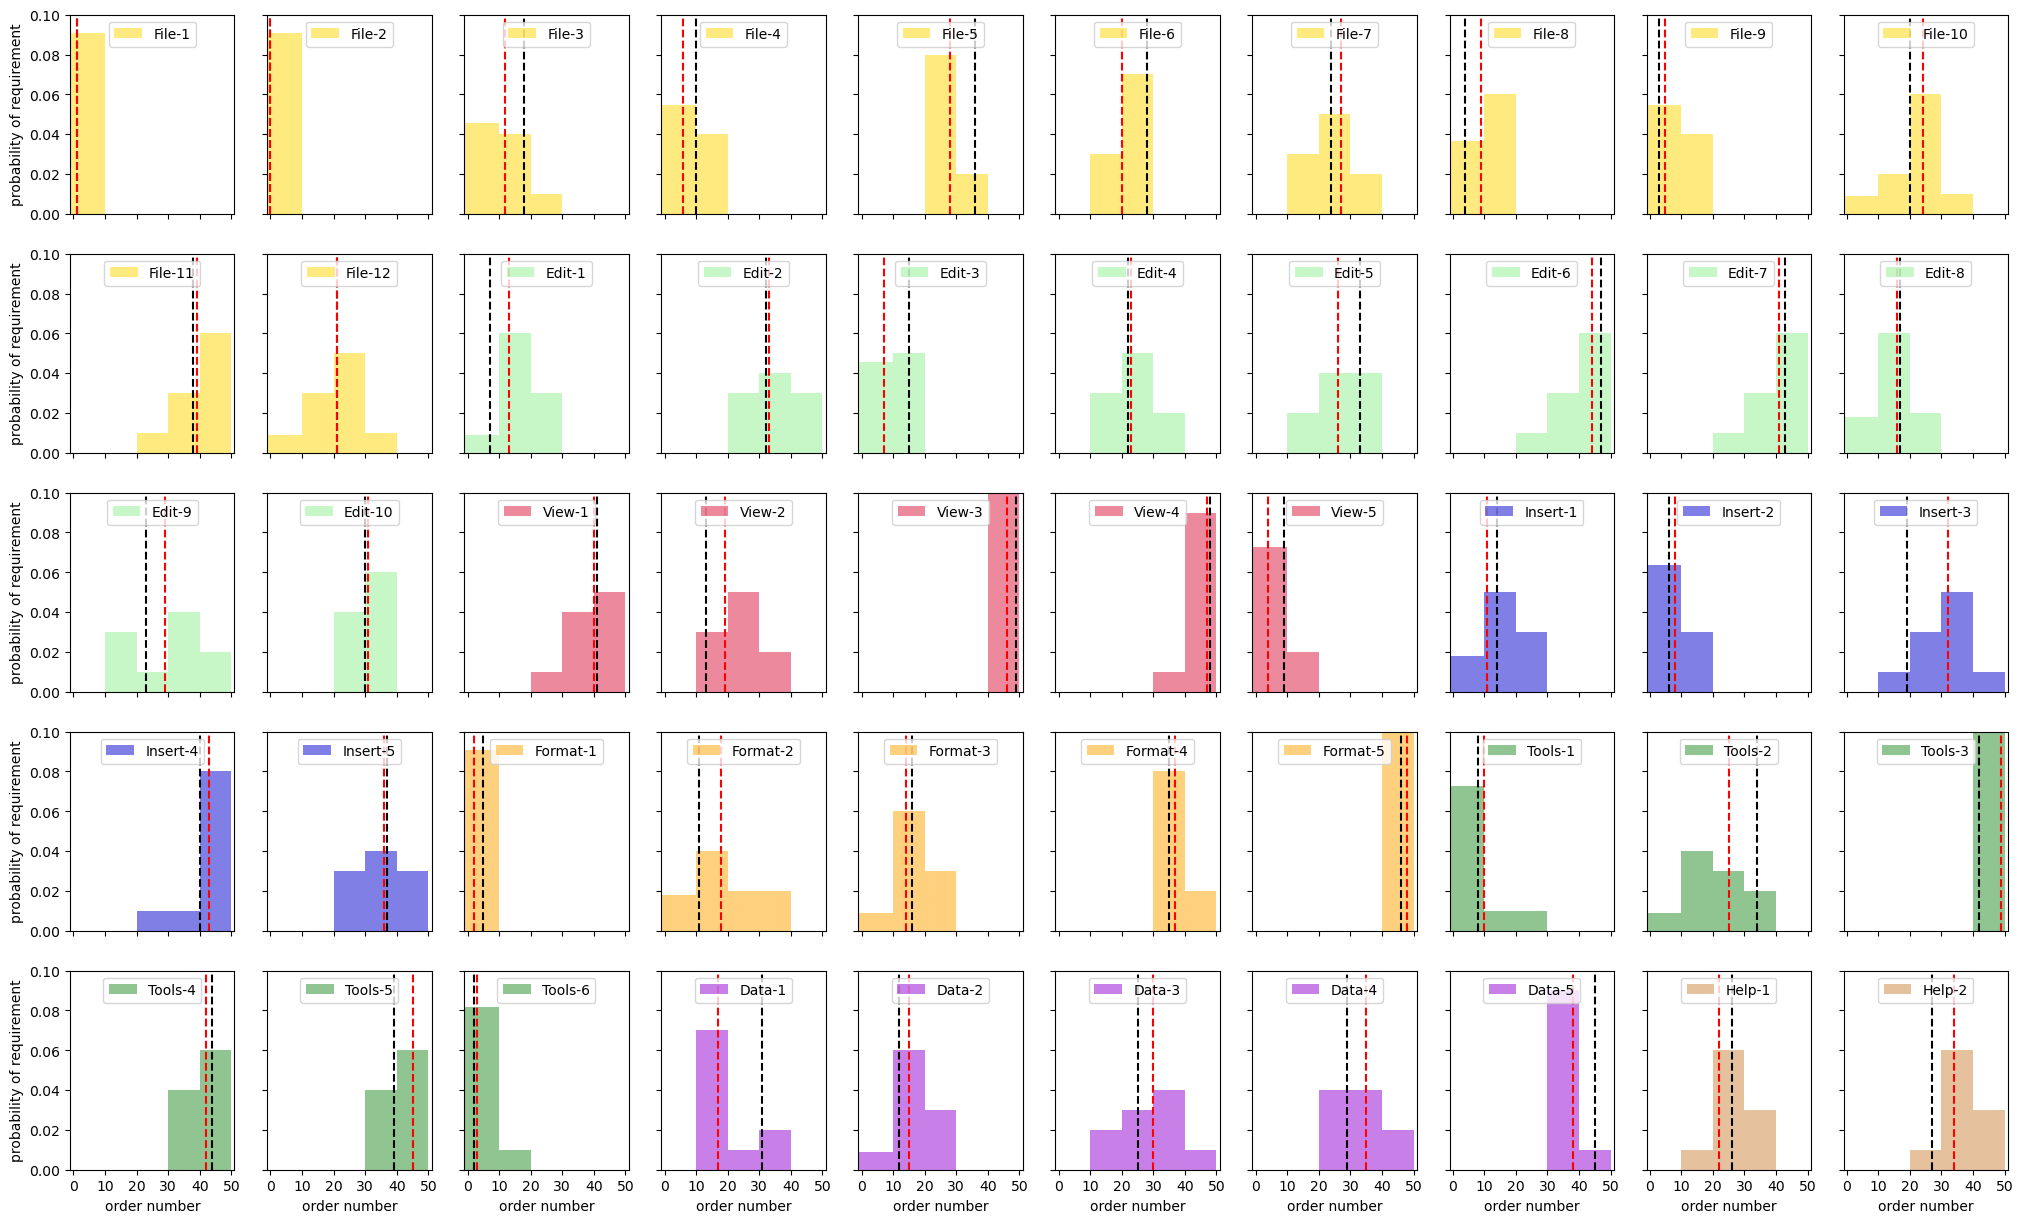

In [37]:
fig,axs = plt.subplots(5,10,figsize=(25,15), sharex=True, sharey=True)
colors = ['gold']*12+['lightgreen']*10+['crimson']*5+['mediumblue']*5+['orange']*5+['forestgreen']*6+['darkviolet']*5+['peru']*2

for jj in range(num_requirements):
    axs[jj//10,jj%10].hist(dictionIBEA[jj],bins=[-1,10,20,30,40,50], density=True, 
                           color=colors[jj], alpha=0.5,
                           label=dfile_req['ID'][jj])
    axs[jj//10,jj%10].vlines(x=maxSol[jj],ymin=0,ymax=0.1,color='black',linestyle='--')
    axs[jj//10,jj%10].vlines(x=cols[jj],ymin=0,ymax=0.1,color='red',linestyle='--')
    
    
    axs[jj//10,jj%10].set_xlim([-1,num_requirements+1])
    axs[jj//10,jj%10].set_ylim([0,0.1])
    axs[jj//10,jj%10].legend(loc='upper center')
    axs[jj//10,jj%10].set_xticks([0,10,20,30,40,50])
    if jj%10==0: axs[jj//10,jj%10].set_ylabel('probability of requirement')
    if jj//10==4: axs[jj//10,jj%10].set_xlabel('order number')
    
plt.savefig('IBEA_maxit%d_numsol%d_nruns%d_performance.png'%(max_generations,population_size,Nruns))
with open('IBEA_bestrun_details.txt','a+') as f:
    f.write('%5d|%5d|%5d|%7.3f|['%(max_generations,population_size,Nruns,maxIBEA)+','.join(str(i) for i in maxSol)+']\n')
plt.show()

In [ ]:
# Adding some informative columns about parts of the fitness function for the output file to be created
dfile_req["Importance"] = Imp
dfile_req["Dependency"] = depNum
dfile_req["Implementation Cost"] = Imp_Cost
dfile_req["Cost Overrun Probability"] = p_cost

# Sorting the output file according to the solution vector
dfile_req.index = best_solution
ibeafile_req = dfile_req.sort_index()
ibeafile_req

In [ ]:
# Printing the output file to a .csv file called ParticleSwarm2_output.csv
ibeafile_req.to_csv('IBEA_output.csv', index=False, encoding='utf-8', sep=";")

# Simulated Annealing

In [19]:
import SimulatedAnnealing as sa

2.55313 2.55392


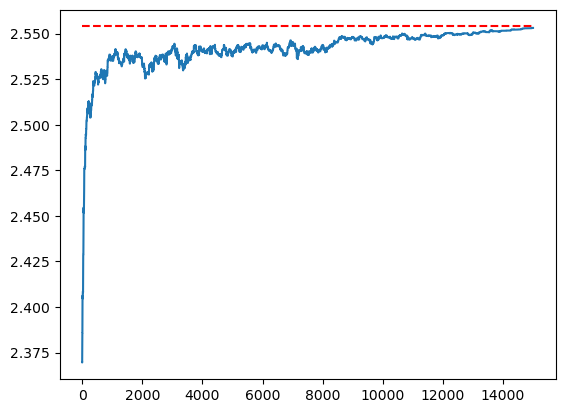

In [38]:
initial_temperature = 0.001
pool_size = 10000
num_requirements = 50
max_iterations = 15000

optimized_solution, values, solutions = sa.simulated_annealing(objective_function=fitness_function,
                                         num_requirements=num_requirements,
                                         pool_size=pool_size,
                                         max_iterations=max_iterations,
                                         temperature=initial_temperature)

print('%.5f %.5f'%(fitness_function(optimized_solution),hungalg))
plt.plot(values)
plt.hlines(hungalg, 0, max_iterations, color='r', linestyle='--')
plt.savefig('SA_maxit%d_initT_%.5f_convergence.png'%(max_iterations, initial_temperature))
plt.show()

In [26]:
dictionSA = {}
for jj in range(num_requirements):
    dictionSA[jj] = list()
for ii in range(len(solutions)):
    for jj in range(num_requirements):
        dictionSA[jj].append(solutions[ii][jj])

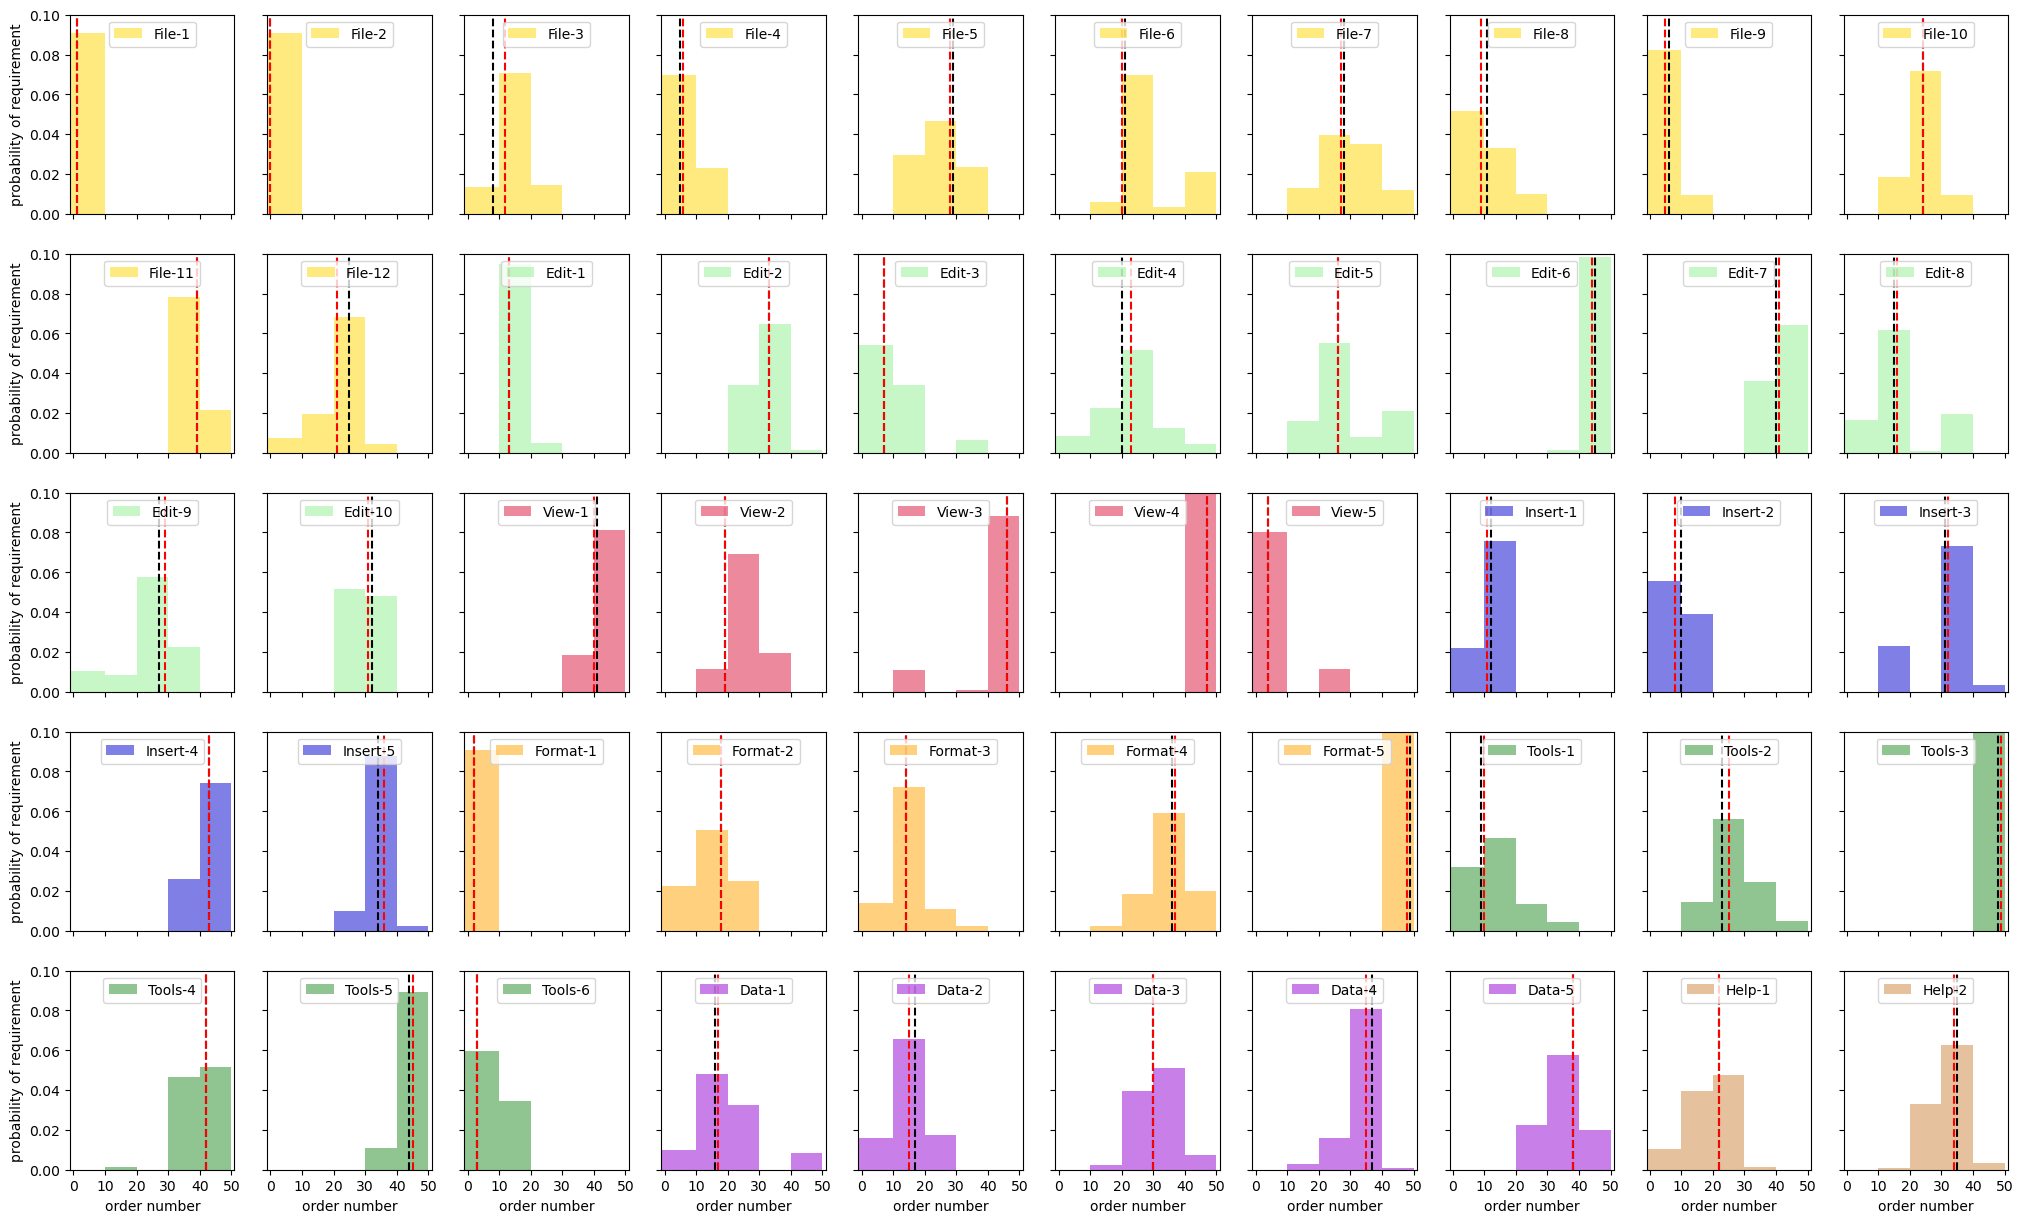

In [32]:
fig,axs = plt.subplots(5,10,figsize=(25,15), sharex=True, sharey=True)
colors = ['gold']*12+['lightgreen']*10+['crimson']*5+['mediumblue']*5+['orange']*5+['forestgreen']*6+['darkviolet']*5+['peru']*2

for jj in range(num_requirements):
    axs[jj//10,jj%10].hist(dictionSA[jj],bins=[-1,10,20,30,40,50], density=True, 
                           color=colors[jj], alpha=0.5,
                           label=dfile_req['ID'][jj])
    axs[jj//10,jj%10].vlines(x=optimized_solution[jj],ymin=0,ymax=0.1,color='black',linestyle='--')
    axs[jj//10,jj%10].vlines(x=cols[jj],ymin=0,ymax=0.1,color='red',linestyle='--')
    
    axs[jj//10,jj%10].set_xlim([-1,num_requirements+1])
    axs[jj//10,jj%10].set_ylim([0,0.1])
    axs[jj//10,jj%10].legend(loc='upper center')
    axs[jj//10,jj%10].set_xticks([0,10,20,30,40,50])
    if jj%10==0: axs[jj//10,jj%10].set_ylabel('probability of requirement')
    if jj//10==4: axs[jj//10,jj%10].set_xlabel('order number')
    
plt.savefig('SA_maxit%d_initT_%.5f_performance.png'%(max_iterations, initial_temperature))
#with open('SA_bestrun_details.txt','a+') as f:
#    f.write('%5d|%5d|%5d|%7.3f|['%(max_iterations,initial_temperature,maxPSO)+','.join(str(i) for i in maxSol)+']\n')
plt.show()

# Hungarian Algorithm

In [21]:
import numpy as np
from scipy.optimize import linear_sum_assignment

def maximize_sum(matrix):
    # Transform the matrix to convert the problem from maximization to minimization
    # We subtract each element from a value larger than the maximum element in the matrix
    max_value = matrix.max()
    transformed_matrix = max_value - matrix

    # Apply the Hungarian Algorithm (linear_sum_assignment) to the transformed matrix
    row_indices, col_indices = linear_sum_assignment(transformed_matrix)

    # Calculate the maximum sum using the original matrix
    max_sum = matrix[row_indices, col_indices].sum()
    
    return max_sum, row_indices, col_indices

(17, array([0, 1, 2]), array([2, 1, 0]))

In [22]:
mat = fitness_function_matrix(Imp, depNum, Imp_Cost, p_cost)

In [28]:
max_sum, rows, cols = maximize_sum(mat)
hungalg = max_sum
print(rows, cols)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] [ 1  0 12  6 28 20 27  9  5 24 39 21 13 33  7 23 26 44 41 16 29 31 40 19
 46 47  4 11  8 32 43 36  2 18 14 37 48 10 25 49 42 45  3 17 15 30 35 38
 22 34]


In [ ]:
%%time

N = 10000
mat = np.random.random(size=(N,N))
max_sum, rows, cols = maximize_sum(mat)
cols